In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import glob
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import qutip
import theano
import theano.tensor as T
from collections import OrderedDict
import itertools
import os
import sys

src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

from qubit_network.QubitNetwork import QubitNetwork
import qubit_network as qn
import qubit_network.net_analysis_tools as nat
from utils import chop

In [298]:
nat.resave_all_pickle_as_json()

In [2]:
nat.print_saved_nets_info().sort_values(by='fid', ascending=False)

An error was raised during processing of ../data/nets/CCrandomrandom_3q+1a_all.pickle
An error was raised during processing of ../data/nets/controlled_stuff.pickle
An error was raised during processing of ../data/nets/hadamard5qb.pickle


,name,num_qubits,num_ancillae,fid
15,toffoli_3q_all_1fid,3,0,1.000000
14,fredkin_3q+1a_paperTopology_1fid,4,1,1.000000
21,ccphase_3q_all_1fid,3,0,1.000000
4,hadamard,4,1,1.000000
20,toffoli,4,1,1.000000
24,fredkin_Banchietal,4,1,1.000000
18,fredkin_best,4,1,0.999989
0,fredkin_3q_all_0.9999fid,3,0,0.999985
10,toffredkin_3q+1a_0.9999fid,4,1,0.999982
17,toffoli_3q_all_0.9999fid,3,0,0.999911


Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


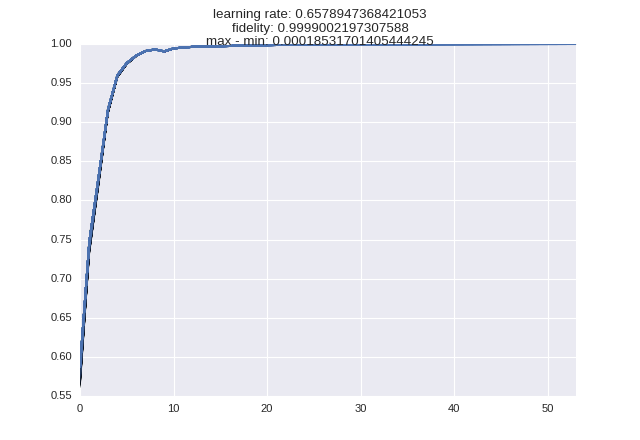

Finished training
Final fidelity: 0.9999000831720375


In [28]:
net = QubitNetwork(
    num_qubits=3,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

<IPython.core.display.Javascript object>


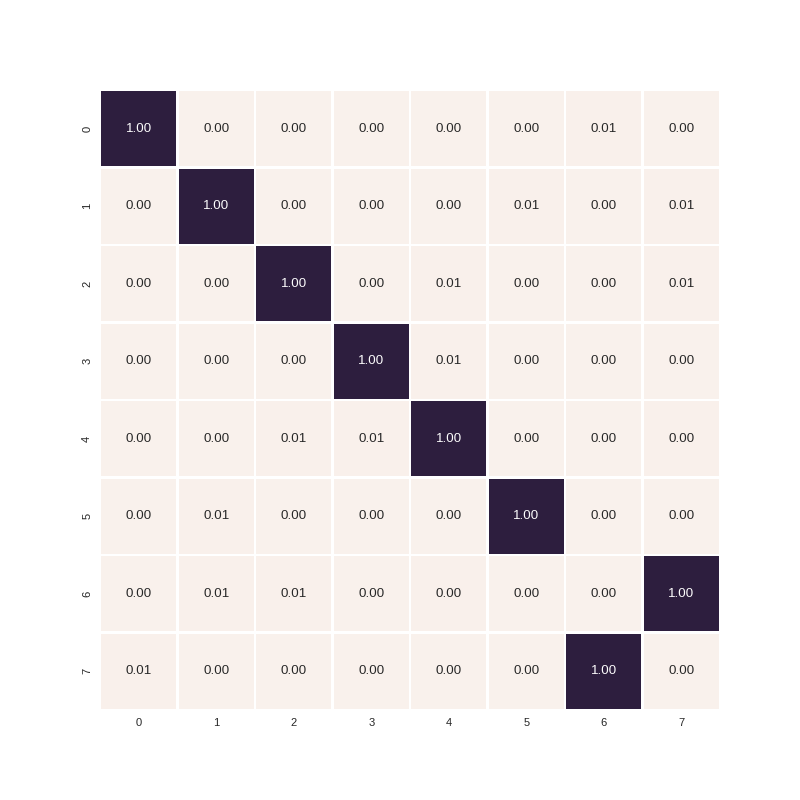

In [47]:
toffoli_net = qn.load_network_from_file('../data/nets/toffoli_3q_all_0.9999fid.pickle')
qn.plot_gate(toffoli_net)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


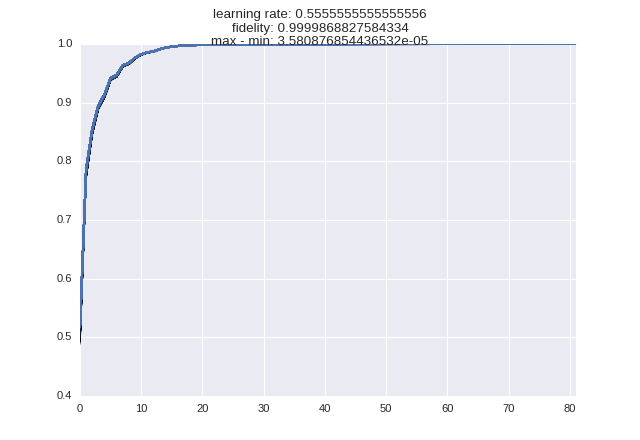

Finished training
Final fidelity: 0.9999870129729205


In [41]:
net = QubitNetwork(
    num_qubits=3,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=qutip.fredkin(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

<IPython.core.display.Javascript object>


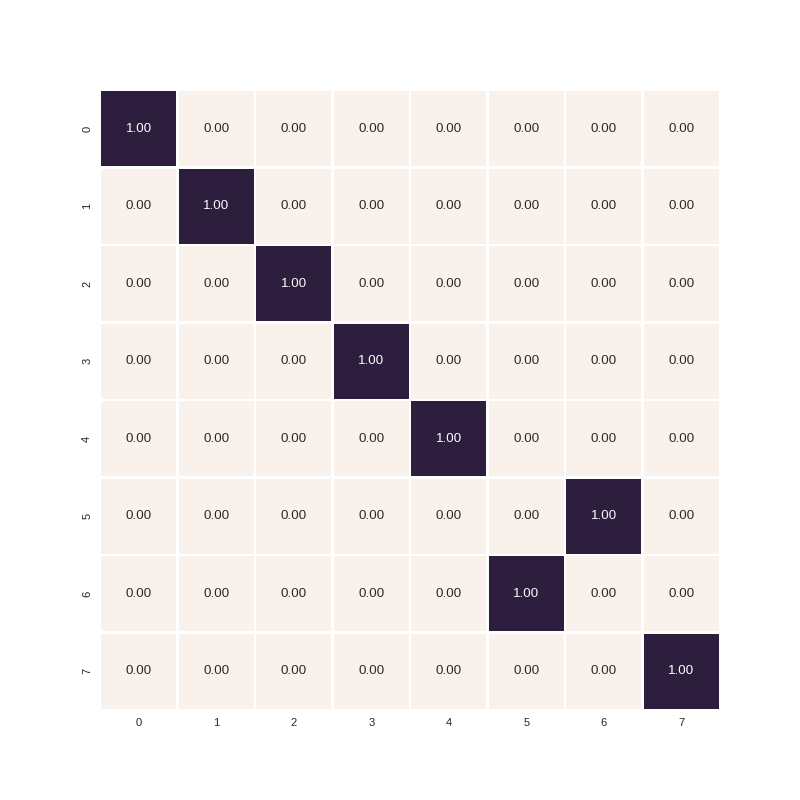

In [48]:
fredkin_net = qn.load_network_from_file('../data/nets/fredkin_3q_all_0.9999fid.pickle')
qn.plot_gate(fredkin_net)

<IPython.core.display.Javascript object>


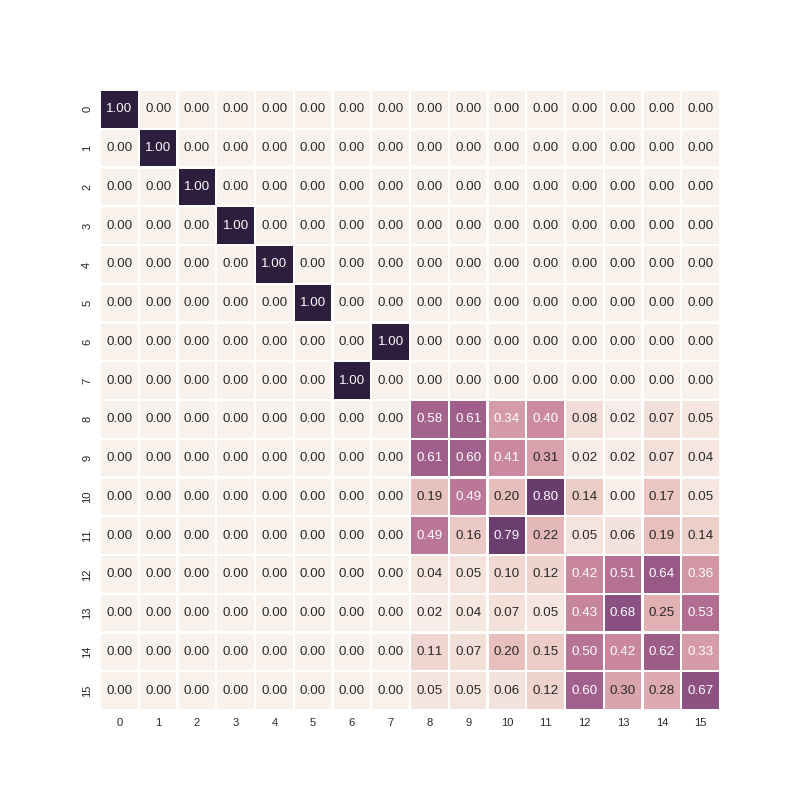

In [192]:
qn.plot_gate(othernet, permutation=[3, 0, 1, 2])

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


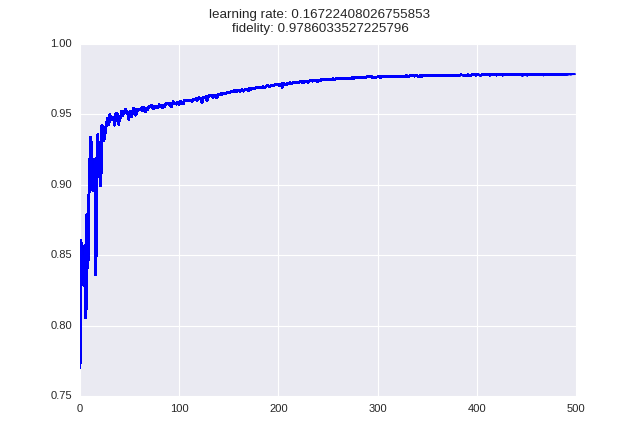

Finished training
Final fidelity: 0.9796845401087426


In [15]:
import scipy
theta = 0.3
generator = qutip.tensor(qutip.sigmax(), qutip.sigmax(), qutip.sigmax()).data.toarray()
target_gate = scipy.linalg.expm(1j * theta * generator)
target_gate = qutip.Qobj(target_gate, dims=([[2] * 3] * 2))

net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=target_gate,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

In [19]:
net.save_to_file('../data/nets/xxx.json', fmt='json')

<IPython.core.display.Javascript object>


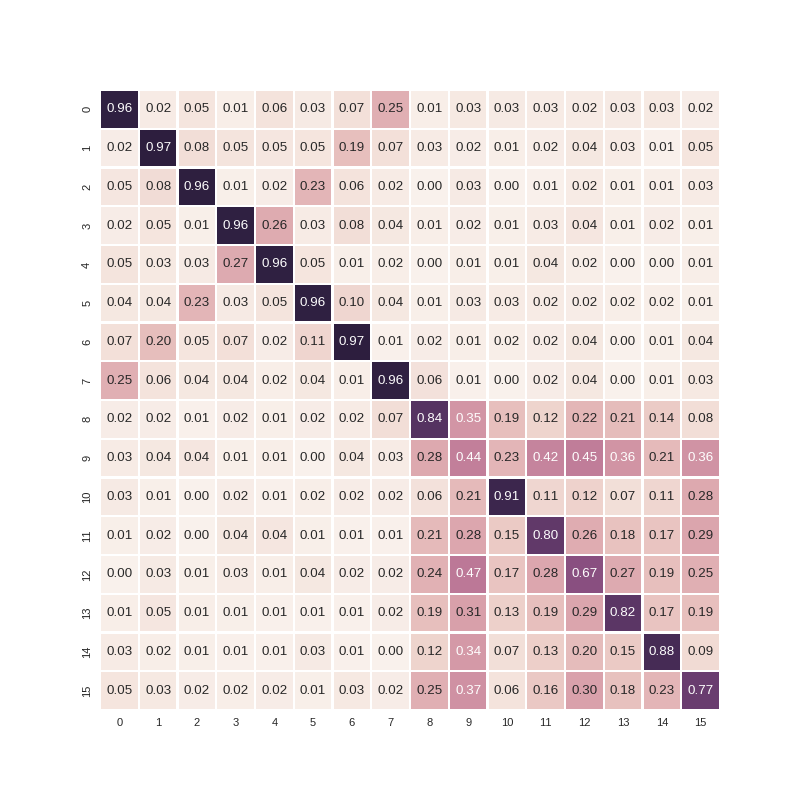

In [21]:
qn.plot_gate(net, permutation=[3, 0, 1, 2])

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


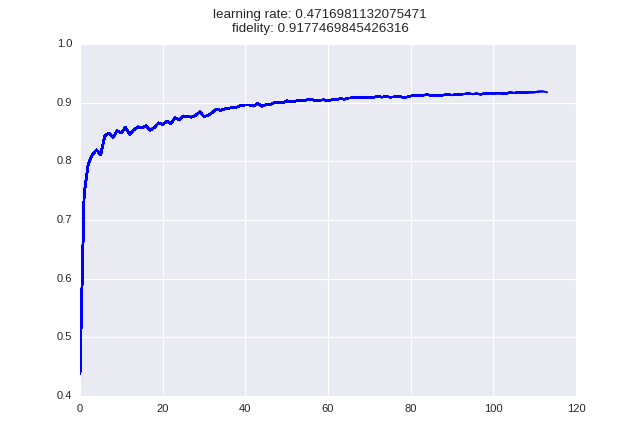

Finished training
Final fidelity: 0.931952228742445


In [22]:
theta = 0.5
generator = qutip.tensor(qutip.sigmax(), qutip.sigmax(), qutip.sigmax()).data.toarray()
target_gate = scipy.linalg.expm(1j * theta * generator)
target_gate = qutip.Qobj(target_gate, dims=([[2] * 3] * 2))

net2 = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net2,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=target_gate,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


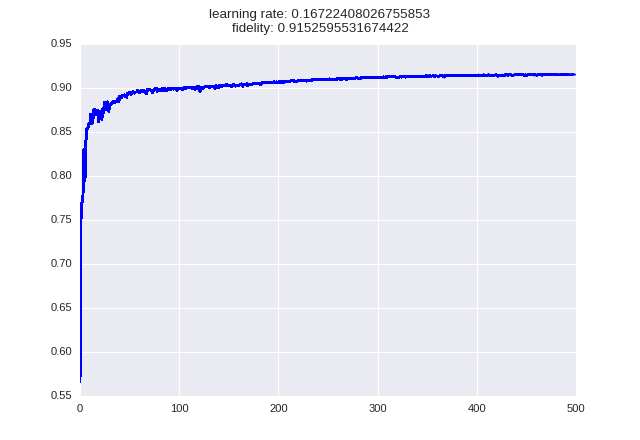

Finished training
Final fidelity: 0.8965467791388925


In [78]:
theta = 0.5
generator = qutip.tensor(qutip.sigmax(), qutip.sigmax(), qutip.sigmax()).data.toarray()
target_gate = scipy.linalg.expm(1j * theta * generator)
target_gate = qutip.Qobj(target_gate, dims=([[2] * 3] * 2))

net2 = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net2,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=target_gate,
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

# Training for an XXX gate, with no ancillae
### Low fidelity for $X_1 X_2 X_3$:

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


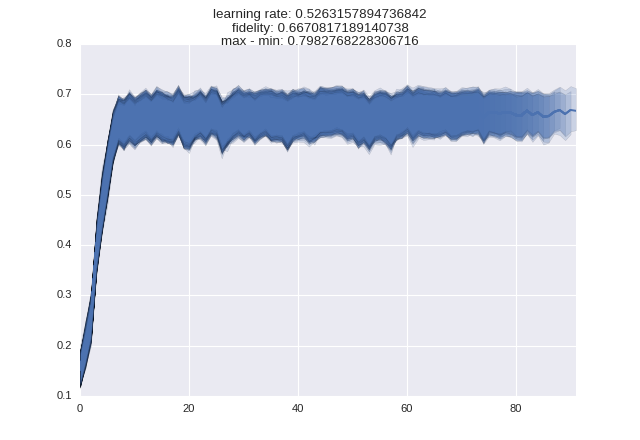

Finished training
Final fidelity: 0.6338480008697694


In [67]:
net = QubitNetwork(
    num_qubits=3,
    system_qubits=3,
    interactions='all'
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=qutip.tensor(qutip.sigmax(), qutip.sigmax(), qutip.sigmax()),
    training_dataset_size=100,
    test_dataset_size=200,
    decay_rate=.01
)

### Low fidelity for $Y_1 Y_2 Y_3$:

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


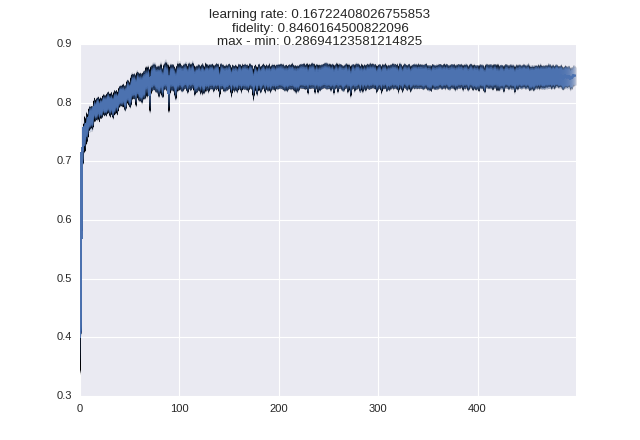

Finished training
Final fidelity: 0.8604191757435755


In [68]:
net = QubitNetwork(
    num_qubits=3,
    system_qubits=3,
    interactions='all'
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=qutip.tensor(qutip.sigmaz(), qutip.sigmaz(), qutip.sigmaz()),
    training_dataset_size=100,
    test_dataset_size=200,
    decay_rate=.01
)

# Successful training of a *Toffredkin* gate
That is, a doubly controlled CNOT + SWAP gate.

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


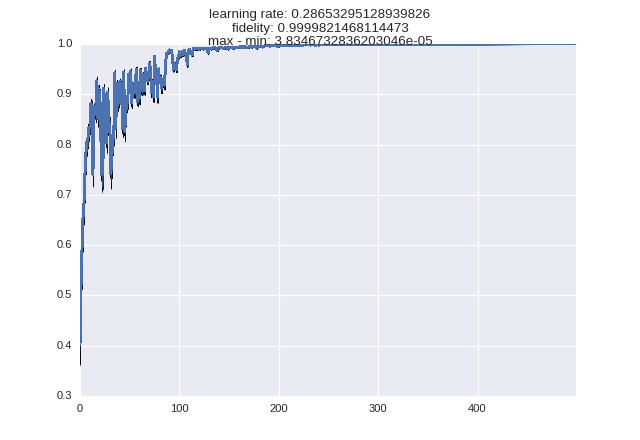

Finished training
Final fidelity: 0.9999822625263912


In [91]:
toffredkin = (qutip.tensor(qutip.projection(2, 0, 0), qutip.cnot()) +
 qutip.tensor(qutip.projection(2, 1, 1), qutip.swap()))

net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=toffredkin,
    training_dataset_size=100,
    test_dataset_size=200,
    decay_rate=.005
)

# Successful training of $\exp\left(\frac{i\pi}{2}X_1 X_2 X_3\right)$ gate (duh!)
Note that $\exp\left(\frac{i\pi}{2}X_1 X_2 X_3\right) = i X_1 X_2 X_3$, which is separable.
The training should be possible even without ancilla.

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


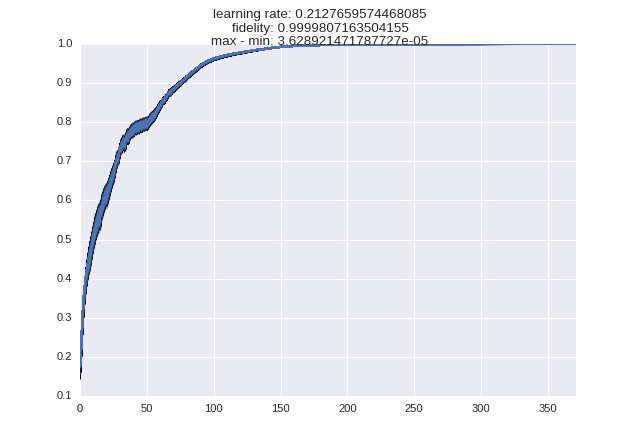

Finished training
Final fidelity: 0.9999816970868486


In [7]:
import scipy
theta = np.pi / 2.
generator = qutip.tensor(qutip.sigmax(), qutip.sigmax(), qutip.sigmax()).data.toarray()
target_gate = scipy.linalg.expm(1j * theta * generator)
target_gate = qutip.Qobj(target_gate, dims=([[2] * 3] * 2))

net = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=target_gate,
    training_dataset_size=100,
    test_dataset_size=200,
    decay_rate=.01
)

# Not so successful training of $\exp\left(\frac{i}{2}X_1 X_2 X_3\right)$
Note that $\exp\left(\frac{i}{2}X_1 X_2 X_3\right) = \cos(0.5) + i \sin(0.5) X_1 X_2 X_3$, which is not separable.

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


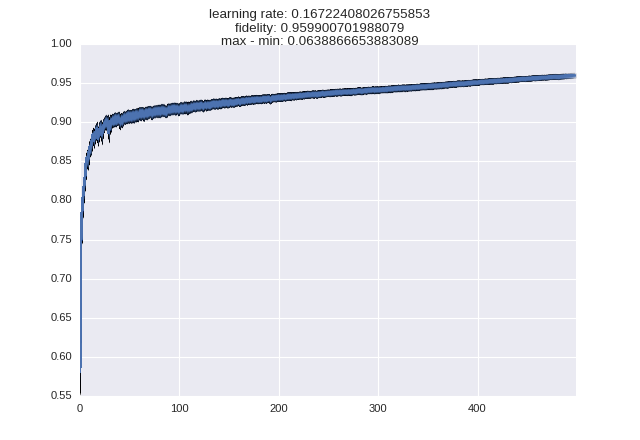

Finished training
Final fidelity: 0.9664672482880043


In [3]:
import scipy
theta = 0.5
generator = qutip.tensor(qutip.sigmax(), qutip.sigmax(), qutip.sigmax()).data.toarray()
target_gate = scipy.linalg.expm(1j * theta * generator)
target_gate = qutip.Qobj(target_gate, dims=([[2] * 3] * 2))

net2 = QubitNetwork(
    num_qubits=4,
    system_qubits=3,
    interactions='all'
#     J=new_Jvalues
)
qn.sgd_optimization(
    net=net2,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=target_gate,
    training_dataset_size=100,
    test_dataset_size=200,
    decay_rate=.01
)

# Try to implement various C-Stuff nets, without ancillae

In [9]:
def controlled_gate(gate):
    p00 = qutip.projection(2, 0, 0)
    p11 = qutip.projection(2, 1, 1)
    id2 = qutip.tensor(qutip.qeye(2), qutip.qeye(2))
    return qutip.tensor(p00, id2) + qutip.tensor(p11, gate)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


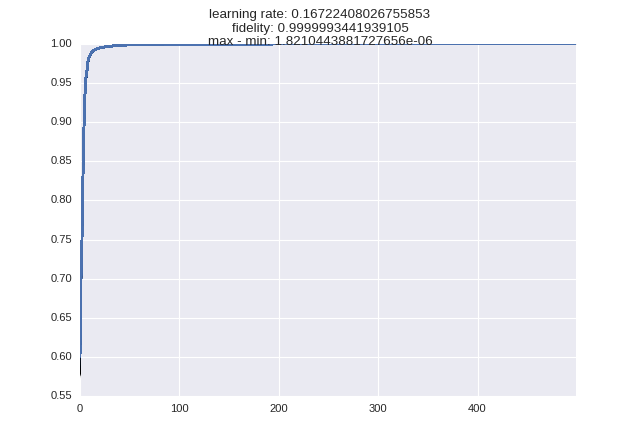

Finished training
Final fidelity: 0.999999218471872


In [13]:
net = QubitNetwork(
    num_qubits=3,
    system_qubits=3,
    interactions='all'
)
qn.sgd_optimization(
    net=net,
    learning_rate=1,
    n_epochs=500,
    batch_size=10,
    target_gate=controlled_gate(qutip.cphase(np.pi)),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


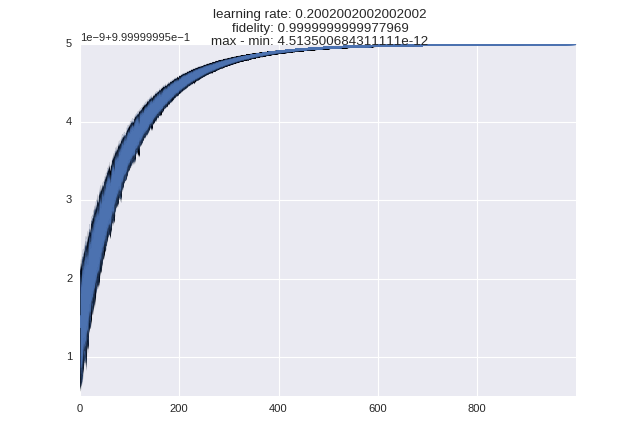

Finished training
Final fidelity: 0.9999999999972836


In [16]:
qn.sgd_optimization(
    net=net,
    learning_rate=0.4,
    n_epochs=1000,
    batch_size=10,
    target_gate=controlled_gate(qutip.cphase(np.pi)),
    training_dataset_size=50,
    test_dataset_size=100,
    decay_rate=.001
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


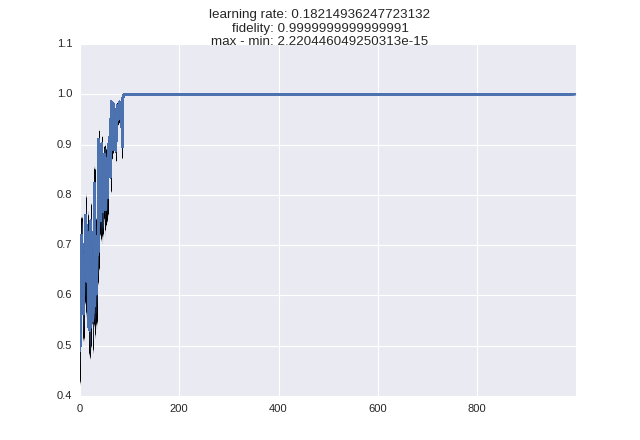

Finished training
Final fidelity: 0.9999999999999993


In [20]:
ccH = (qutip.tensor(qutip.projection(2, 0, 0), qutip.qeye(2), qutip.qeye(2)) +
       qutip.tensor(qutip.projection(2, 1, 1), qutip.qeye(2), qutip.hadamard_transform()))
net = QubitNetwork(
    num_qubits=3,
    system_qubits=3,
    interactions='all'
)
qn.sgd_optimization(
    net=net,
    learning_rate=2,
    n_epochs=1000,
    batch_size=10,
    target_gate=ccH,
    training_dataset_size=50,
    test_dataset_size=100,
    decay_rate=.01
)

In [22]:
net.save_to_file('../data/nets/ccH_3q_all_1fid.pickle', fmt='pickle')

In [33]:
2

2

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


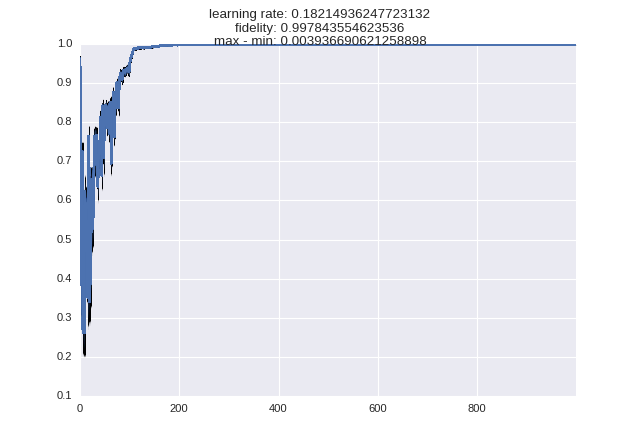

Finished training
Final fidelity: 0.9980538897553398


In [32]:
net = qn.load_network_from_file('../data/nets/fredkin_best.pickle')
qn.sgd_optimization(
    net=net,
    learning_rate=2,
    n_epochs=1000,
    batch_size=10,
    training_dataset_size=50,
    test_dataset_size=100,
    decay_rate=.01
)

In [34]:
net.save_to_file('../data/nets/temp.pickle')

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


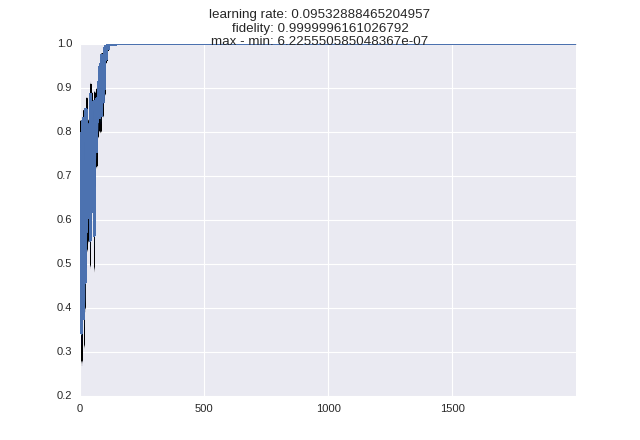

Finished training
Final fidelity: 0.9999996443369217


In [35]:
net = qn.load_network_from_file('../data/nets/fredkin_best.pickle')
qn.sgd_optimization(
    net=net,
    learning_rate=2,
    n_epochs=2000,
    batch_size=10,
    training_dataset_size=50,
    test_dataset_size=100,
    decay_rate=.01
)
net.save_to_file('../data/nets/temp2.pickle')

In [88]:
filenames = glob.glob('../data/nets/toffoli_*pickle')
ints = [(filename, len(qn.load_network_from_file(filename).get_interactions_with_Js()))
        for filename in filenames]
# [it for it in ints if it[1] == 58]
ints

[('../data/nets/toffoli_Banchietal.pickle', 20),
 ('../data/nets/toffoli_all_21070402.pickle', 66),
 ('../data/nets/toffoli_3q_all_1fid.pickle', 36),
 ('../data/nets/toffoli_3q_all_0.9999fid.pickle', 36)]

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


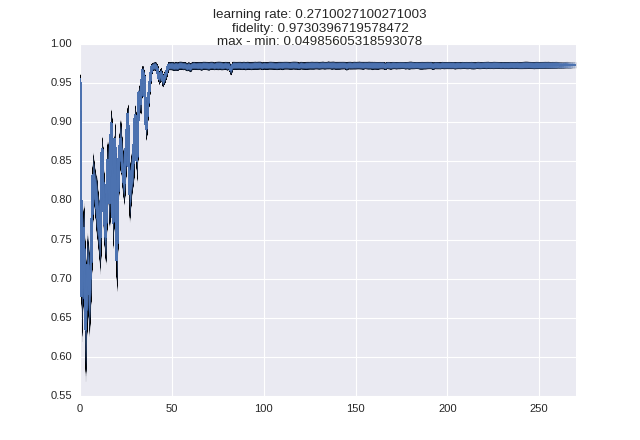

Finished training
Final fidelity: 0.9703712382025229


In [90]:
filename = glob.glob('../data/nets/toffoli_all*.pickle')[0]
toffoli_net = qn.load_network_from_file(filename)
qn.sgd_optimization(
    net=toffoli_net,
    learning_rate=1,
    n_epochs=2000,
    batch_size=10,
    training_dataset_size=50,
    test_dataset_size=100,
    decay_rate=.01
)

Generating training data...
Building the model...
Let's roll!


<IPython.core.display.Javascript object>


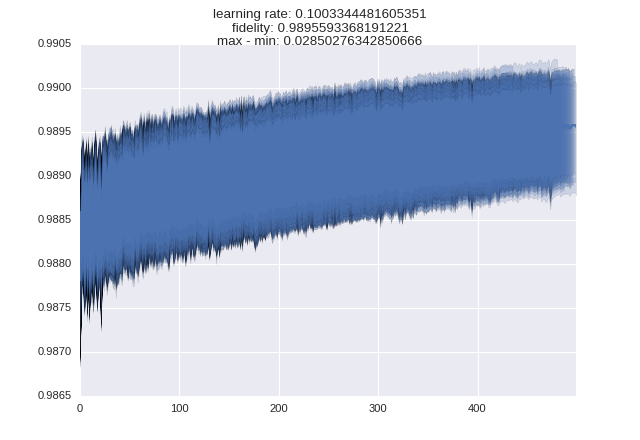

Finished training
Final fidelity: 0.9919948041867841


In [94]:
qn.sgd_optimization(
    net=net,
    learning_rate=.6,
    n_epochs=500,
    batch_size=10,
    target_gate=qutip.toffoli(),
    training_dataset_size=100,
    test_dataset_size=1000,
    decay_rate=.01
)

<IPython.core.display.Javascript object>


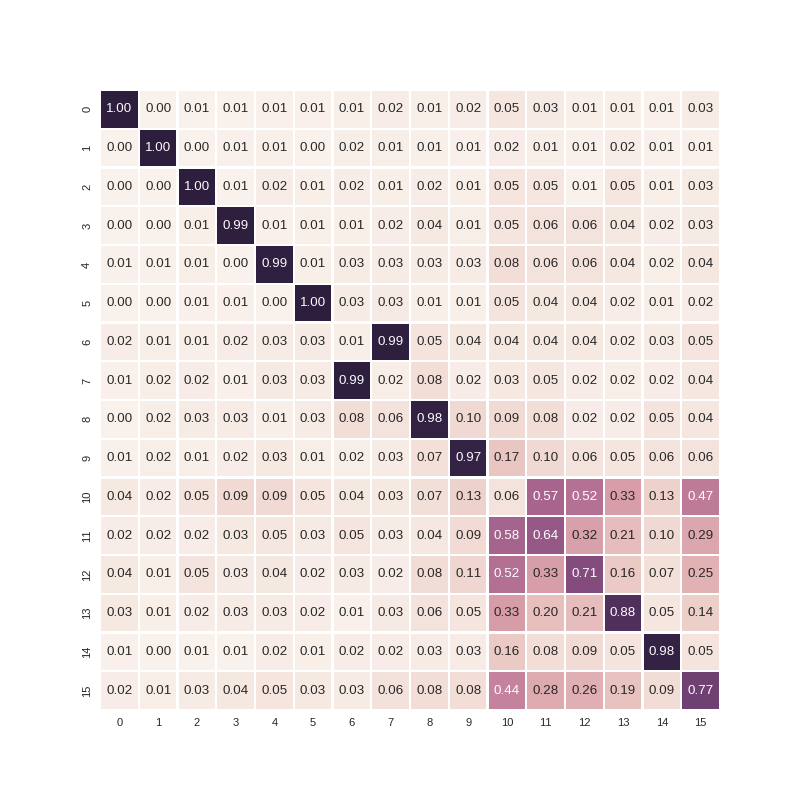

In [97]:
nat.plot_gate(net, permutation=[3, 0, 1, 2])

In [95]:
net.test_fidelity_without_theano(n_samples=200)

0.98960364825855063

In [99]:
net.save_to_file('../data/nets/toffoli_3q+1a_all_0.989fid.json', fmt='json')

In [92]:
glob.glob('../data/nets/toffoli*pickle')

['../data/nets/toffoli_Banchietal.pickle',
 '../data/nets/toffoli_all_21070402.pickle',
 '../data/nets/toffoli_3q_all_1fid.pickle',
 '../data/nets/toffoli_3q_all_0.9999fid.pickle',
 '../data/nets/toffoli.pickle']

In [45]:
foo = qn.load_network_from_file('../data/nets/fredkin_3q+1a_all_0.999999fid.pickle')
foo.save_to_file('../data/nets/fredkin_3q+1a_all_0.999999fid.json', fmt='json')